In [16]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

from data_dictionary import *


summary = pd.read_csv('data/atussum_2014.dat')

summary = summary.rename(columns=renamed_columns)

spectators = summary[[
                     'id',
                     'sex', 
                     'age',
                     'Watching baseball',
                     'Watching basketball',
                     'Watching biking',
                     'Watching billiards',
                     'Watching boating',
                     'Watching equestrian sports',
                     'Watching football',
                     'Watching golfing',
                     'Watching gymnastics',
                     'Watching hockey',
                     'Watching racquet sports',
                     'Watching rodeo competitions',
                     'Watching running',
                     'Watching soccer',
                     'Watching softball',
                     'Watching vehicle touring/racing',
                     'Watching volleyball',
                     'Watching water sports',
                     'Watching people working out, unspecified',
                     'Attending sporting events, n.e.c.*']]

participants = summary[[ 
                         'id',
                         'sex',
                         'age',
                         'Doing aerobics',
                         'Playing baseball',
                         'Playing basketball',
                         'Biking',
                         'Playing billiards',
                         'Boating',
                         'Bowling',
                         'Climbing, spelunking, caving',
                         'Dancing',
                         'Participating in equestrian sports',
                         'Fishing',
                         'Playing football',
                         'Golfing',
                         'Doing gymnastics',
                         'Hiking',
                         'Playing hockey',
                         'Hunting',
                         'Participating in martial arts',
                         'Playing racquet sports',
                         'Rollerblading',
                         'Running',
                         'Skiing, ice skating, snowboarding',
                         'Playing soccer',
                         'Softball',
                         'Using cardiovascular equipment',
                         'Vehicle touring/racing',
                         'Playing volleyball',
                         'Walking',
                         'Participating in water sports',
                         'Weightlifting/strength training',
                         'Working out, unspecified',
                         'Doing yoga',
                         'Playing sports n.e.c.*','Sports, exercise, & recreation, n.e.c.*']]


# Analysis of Particular Relationships in ATUS Data

I was partially inspired by collegiate and professional football this weekend, so I decided to figure out the breakdown of the participants and spectators of sports and other recreational activities by age and gender. I also wanted to see if there were any correlations that would indicate whether a certain demographic would prefer a given activity. 

## Basic information:
Spectators and participants are divided into ages classifications of child or adult, as well as the gender of female or male. Children are anyone under 18 years old, while adults are 18 and over. 


# Spectators:
Of all the spectators, 3.48% are children, and 96.52% are adults; only the data regarding the adults will be used for determining differences, if any exist, between gender preference in sports watching.

The children surveyed spent the most time watching football, baseball, basketball, and water sports. At first, I was surprised at the inclusion of water sports, but then I realized that among children, swimming meets are still a thing. 

The adults surveyed spent the most time watching basketball, football, baseball, and attending sporting events. While the population is skewed highly towards adults rather than children, it makes sense that attending sporting events would be much higher for adults, as they have the means to pay for such events, as well as the ability to travel there more readily. 

Of the adults, 42.24% are men and 54.29% are women. Both genders enjoyed watching the same four activities as the overall adult population surveyed, but women spent more time watching baseball while men spent more time watching basketball. 

In [31]:

child_spectators = spectators[0 < participants.age]
child_spectator = child_spectators[child_spectators.age < 18]
adult_spectator = spectators[spectators.age > 17]
adult_male_spectator = adult_spectator[adult_spectator.sex == 1]
adult_female_spectator = adult_spectator[adult_spectator.sex == 2]

In [18]:
round(len(child_spectator)/len(spectators)*100,2)
round(len(adult_spectator)/len(spectators)*100,2)

96.52

In [19]:
round(len(adult_male_spectator)/len(spectators)*100,2)

42.24

In [20]:
round(len(adult_female_spectator)/len(spectators)*100,2)

54.29

In [21]:
child_spectator.sum()

id                                          8116690949527343
sex                                                      578
age                                                     6491
Watching baseball                                        350
Watching basketball                                      300
Watching biking                                            0
Watching billiards                                         0
Watching boating                                           0
Watching equestrian sports                                 0
Watching football                                        465
Watching golfing                                           0
Watching gymnastics                                        0
Watching hockey                                            0
Watching racquet sports                                    0
Watching rodeo competitions                                0
Watching running                                          95
Watching soccer         

In [22]:
adult_spectator.sum()

id                                          225353758988756146
sex                                                      17482
age                                                     559166
Watching baseball                                         4234
Watching basketball                                       5425
Watching biking                                            105
Watching billiards                                         175
Watching boating                                           150
Watching equestrian sports                                 783
Watching football                                         4252
Watching golfing                                           180
Watching gymnastics                                        180
Watching hockey                                            979
Watching racquet sports                                    120
Watching rodeo competitions                                165
Watching running                                       

In [23]:
adult_female_spectator.sum()

id                                          126745093763443553
sex                                                      12586
age                                                     318149
Watching baseball                                         2734
Watching basketball                                       2163
Watching biking                                             60
Watching billiards                                           0
Watching boating                                           150
Watching equestrian sports                                 375
Watching football                                         2066
Watching golfing                                           180
Watching gymnastics                                        180
Watching hockey                                            934
Watching racquet sports                                    120
Watching rodeo competitions                                  0
Watching running                                       

In [24]:
adult_male_spectator.sum()

id                                          98608665225312593
sex                                                      4896
age                                                    241017
Watching baseball                                        1500
Watching basketball                                      3262
Watching biking                                            45
Watching billiards                                        175
Watching boating                                            0
Watching equestrian sports                                408
Watching football                                        2186
Watching golfing                                            0
Watching gymnastics                                         0
Watching hockey                                            45
Watching racquet sports                                     0
Watching rodeo competitions                               165
Watching running                                            0
Watching

# Participants

Strangely enough, the percentage of participants is broken down into the same ratio of children to adults as that of the spectators. 

Among children, the most time was spent playing basketball, participating in water sports, playing soccer, and working out, unspecified. 


The breakdown of adult participants are 56.23% female and 43.76% male. The average age of females participating is 50.56 years old while the average age of males is 49.23 years old. 

Among adults, the activities with the most time occupied were walking, working out, unspecified, participating in Water sports, and  golfing. It's interesting to see that walking was the activity adults spent the most time on in a given day. This can indicate that walking is a time-intensive activity, as you travel slower compared to almost any other mode of transportation, as well as the fact that adults consider walking its own activity, while only a minority of children reported spending time walking during their day. 

Among men, the activities with the greatest time share were walking, golfing, working out, and hunting, with fishing following closely behind. It would be interesting to see the number of retirees reporting their activities, as it seems that the majority of activities are those that take up a large amount of time, which retirees would have in abundance compared to the working population. It also looks like the men's activity preference skewed the overall population of those surveyed. 

Among women, the activities with the greatest time spent were walking, working out, participating in water sports, and running. Based on commercials seen, I know that osteoporosis is more prevalent among the female population, so it's possible that low impact activities are preferred due to bone density decreasing as one gets older. 

In [36]:
child_participants = participants[0 < participants.age]
child_participant = child_participants[child_participants.age < 18]
adult_participant = participants[participants.age > 17]
adult_male_participant = adult_participant[adult_participant.sex == 1]
adult_female_participant = adult_participant[adult_participant.sex == 2]

In [26]:
round(len(adult_male_participant)/len(adult_participant)*100,2)

43.76

In [37]:
round(len(adult_female_partipant)/len(adult_participant)*100,2)

56.24

In [28]:
child_participants = child_participant[['id', 'age', 'Doing aerobics',
                         'Playing baseball',
                         'Playing basketball',
                         'Biking',
                         'Playing billiards',
                         'Boating',
                         'Bowling',
                         'Climbing, spelunking, caving',
                         'Dancing',
                         'Participating in equestrian sports',
                         'Fishing',
                         'Playing football',
                         'Golfing',
                         'Doing gymnastics',
                         'Hiking',
                         'Playing hockey',
                         'Hunting',
                         'Participating in martial arts',
                         'Playing racquet sports',
                         'Rollerblading',
                         'Running',
                         'Skiing, ice skating, snowboarding',
                         'Playing soccer',
                         'Softball',
                         'Using cardiovascular equipment',
                         'Vehicle touring/racing',
                         'Playing volleyball',
                         'Walking',
                         'Participating in water sports',
                         'Weightlifting/strength training',
                         'Working out, unspecified',
                         'Doing yoga',
                         'Playing sports n.e.c.*','Sports, exercise, & recreation, n.e.c.*']]

In [58]:
adult_female_participant = adult_female_participant[['Doing aerobics',
                         'Playing baseball',
                         'Playing basketball',
                         'Biking',
                         'Playing billiards',
                         'Boating',
                         'Bowling',
                         'Climbing, spelunking, caving',
                         'Dancing',
                         'Participating in equestrian sports',
                         'Fishing',
                         'Playing football',
                         'Golfing',
                         'Doing gymnastics',
                         'Hiking',
                         'Playing hockey',
                         'Hunting',
                         'Participating in martial arts',
                         'Playing racquet sports',
                         'Rollerblading',
                         'Running',
                         'Skiing, ice skating, snowboarding',
                         'Playing soccer',
                         'Softball',
                         'Using cardiovascular equipment',
                         'Vehicle touring/racing',
                         'Playing volleyball',
                         'Walking',
                         'Participating in water sports',
                         'Weightlifting/strength training',
                         'Working out, unspecified',
                         'Doing yoga',
                         'Playing sports n.e.c.*','Sports, exercise, & recreation, n.e.c.*']]

In [45]:
adult_participant = adult_participant[['Doing aerobics',
                         'Playing baseball',
                         'Playing basketball',
                         'Biking',
                         'Playing billiards',
                         'Boating',
                         'Bowling',
                         'Climbing, spelunking, caving',
                         'Dancing',
                         'Participating in equestrian sports',
                         'Fishing',
                         'Playing football',
                         'Golfing',
                         'Doing gymnastics',
                         'Hiking',
                         'Playing hockey',
                         'Hunting',
                         'Participating in martial arts',
                         'Playing racquet sports',
                         'Rollerblading',
                         'Running',
                         'Skiing, ice skating, snowboarding',
                         'Playing soccer',
                         'Softball',
                         'Using cardiovascular equipment',
                         'Vehicle touring/racing',
                         'Playing volleyball',
                         'Walking',
                         'Participating in water sports',
                         'Weightlifting/strength training',
                         'Working out, unspecified',
                         'Doing yoga',
                         'Playing sports n.e.c.*','Sports, exercise, & recreation, n.e.c.*']]

In [40]:
male_participants = adult_male_participant[['id','age', 'Doing aerobics',
                         'Playing baseball',
                         'Playing basketball',
                         'Biking',
                         'Playing billiards',
                         'Boating',
                         'Bowling',
                         'Climbing, spelunking, caving',
                         'Dancing',
                         'Participating in equestrian sports',
                         'Fishing',
                         'Playing football',
                         'Golfing',
                         'Doing gymnastics',
                         'Hiking',
                         'Playing hockey',
                         'Hunting',
                         'Participating in martial arts',
                         'Playing racquet sports',
                         'Rollerblading',
                         'Running',
                         'Skiing, ice skating, snowboarding',
                         'Playing soccer',
                         'Softball',
                         'Using cardiovascular equipment',
                         'Vehicle touring/racing',
                         'Playing volleyball',
                         'Walking',
                         'Participating in water sports',
                         'Weightlifting/strength training',
                         'Working out, unspecified',
                         'Doing yoga',
                         'Playing sports n.e.c.*','Sports, exercise, & recreation, n.e.c.*']]

In [41]:
male_participants.sum()


id                                         98608665225312593
age                                                   241017
Doing aerobics                                           135
Playing baseball                                         535
Playing basketball                                      2004
Biking                                                  3541
Playing billiards                                       1715
Boating                                                 1637
Bowling                                                 1486
Climbing, spelunking, caving                             186
Dancing                                                 1398
Participating in equestrian sports                       450
Fishing                                                 8981
Playing football                                         545
Golfing                                                11356
Doing gymnastics                                           0
Hiking                  

In [43]:
adult_female_participant.sum()

age                                        318149
sex                                         12586
Doing aerobics                               1060
Playing baseball                               30
Playing basketball                            268
Biking                                       1557
Playing billiards                             380
Boating                                      1815
Bowling                                      1705
Climbing, spelunking, caving                  270
Dancing                                      1570
Participating in equestrian sports            376
Fishing                                       925
Playing football                                0
Golfing                                      1724
Doing gymnastics                              180
Hiking                                       2850
Playing hockey                                  0
Hunting                                       120
Participating in martial arts                 233


In [46]:
child_participant.sum()

id                                         8116690949527343
sex                                                     578
age                                                    6491
Doing aerobics                                            0
Playing baseball                                        741
Playing basketball                                     3097
Biking                                                  765
Playing billiards                                       120
Boating                                                   0
Bowling                                                 623
Climbing, spelunking, caving                              0
Dancing                                                 555
Participating in equestrian sports                      360
Fishing                                                   0
Playing football                                        967
Golfing                                                 155
Doing gymnastics                        

In [44]:
adult_participant

,age,sex,Doing aerobics,Playing baseball,Playing basketball,Biking,Playing billiards,Boating,Bowling,"Climbing, spelunking, caving",...,Using cardiovascular equipment,Vehicle touring/racing,Playing volleyball,Walking,Participating in water sports,Weightlifting/strength training,"Working out, unspecified",Doing yoga,Playing sports n.e.c.*,"Sports, exercise, & recreation, n.e.c.*"
0,20,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,85,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,28,1,0,0,0,0,0,0,0,0,...,0,0,0,30,0,0,0,0,0,0
8,63,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,85,1,0,0,0,0,0,0,0,0,...,30,0,0,0,0,0,0,0,0,0
10,66,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Graphs: 
The graphs just reinforce how much time adults spend doing each activity, but due to the fact that there are so many activities, it's better to simply look at the data instead of a visual representation.

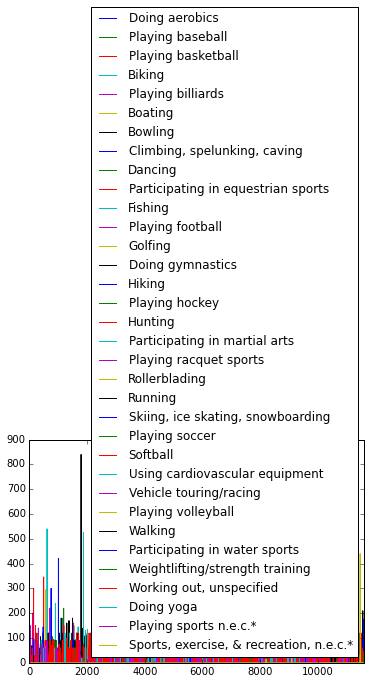

In [56]:
adult_participant.plot()

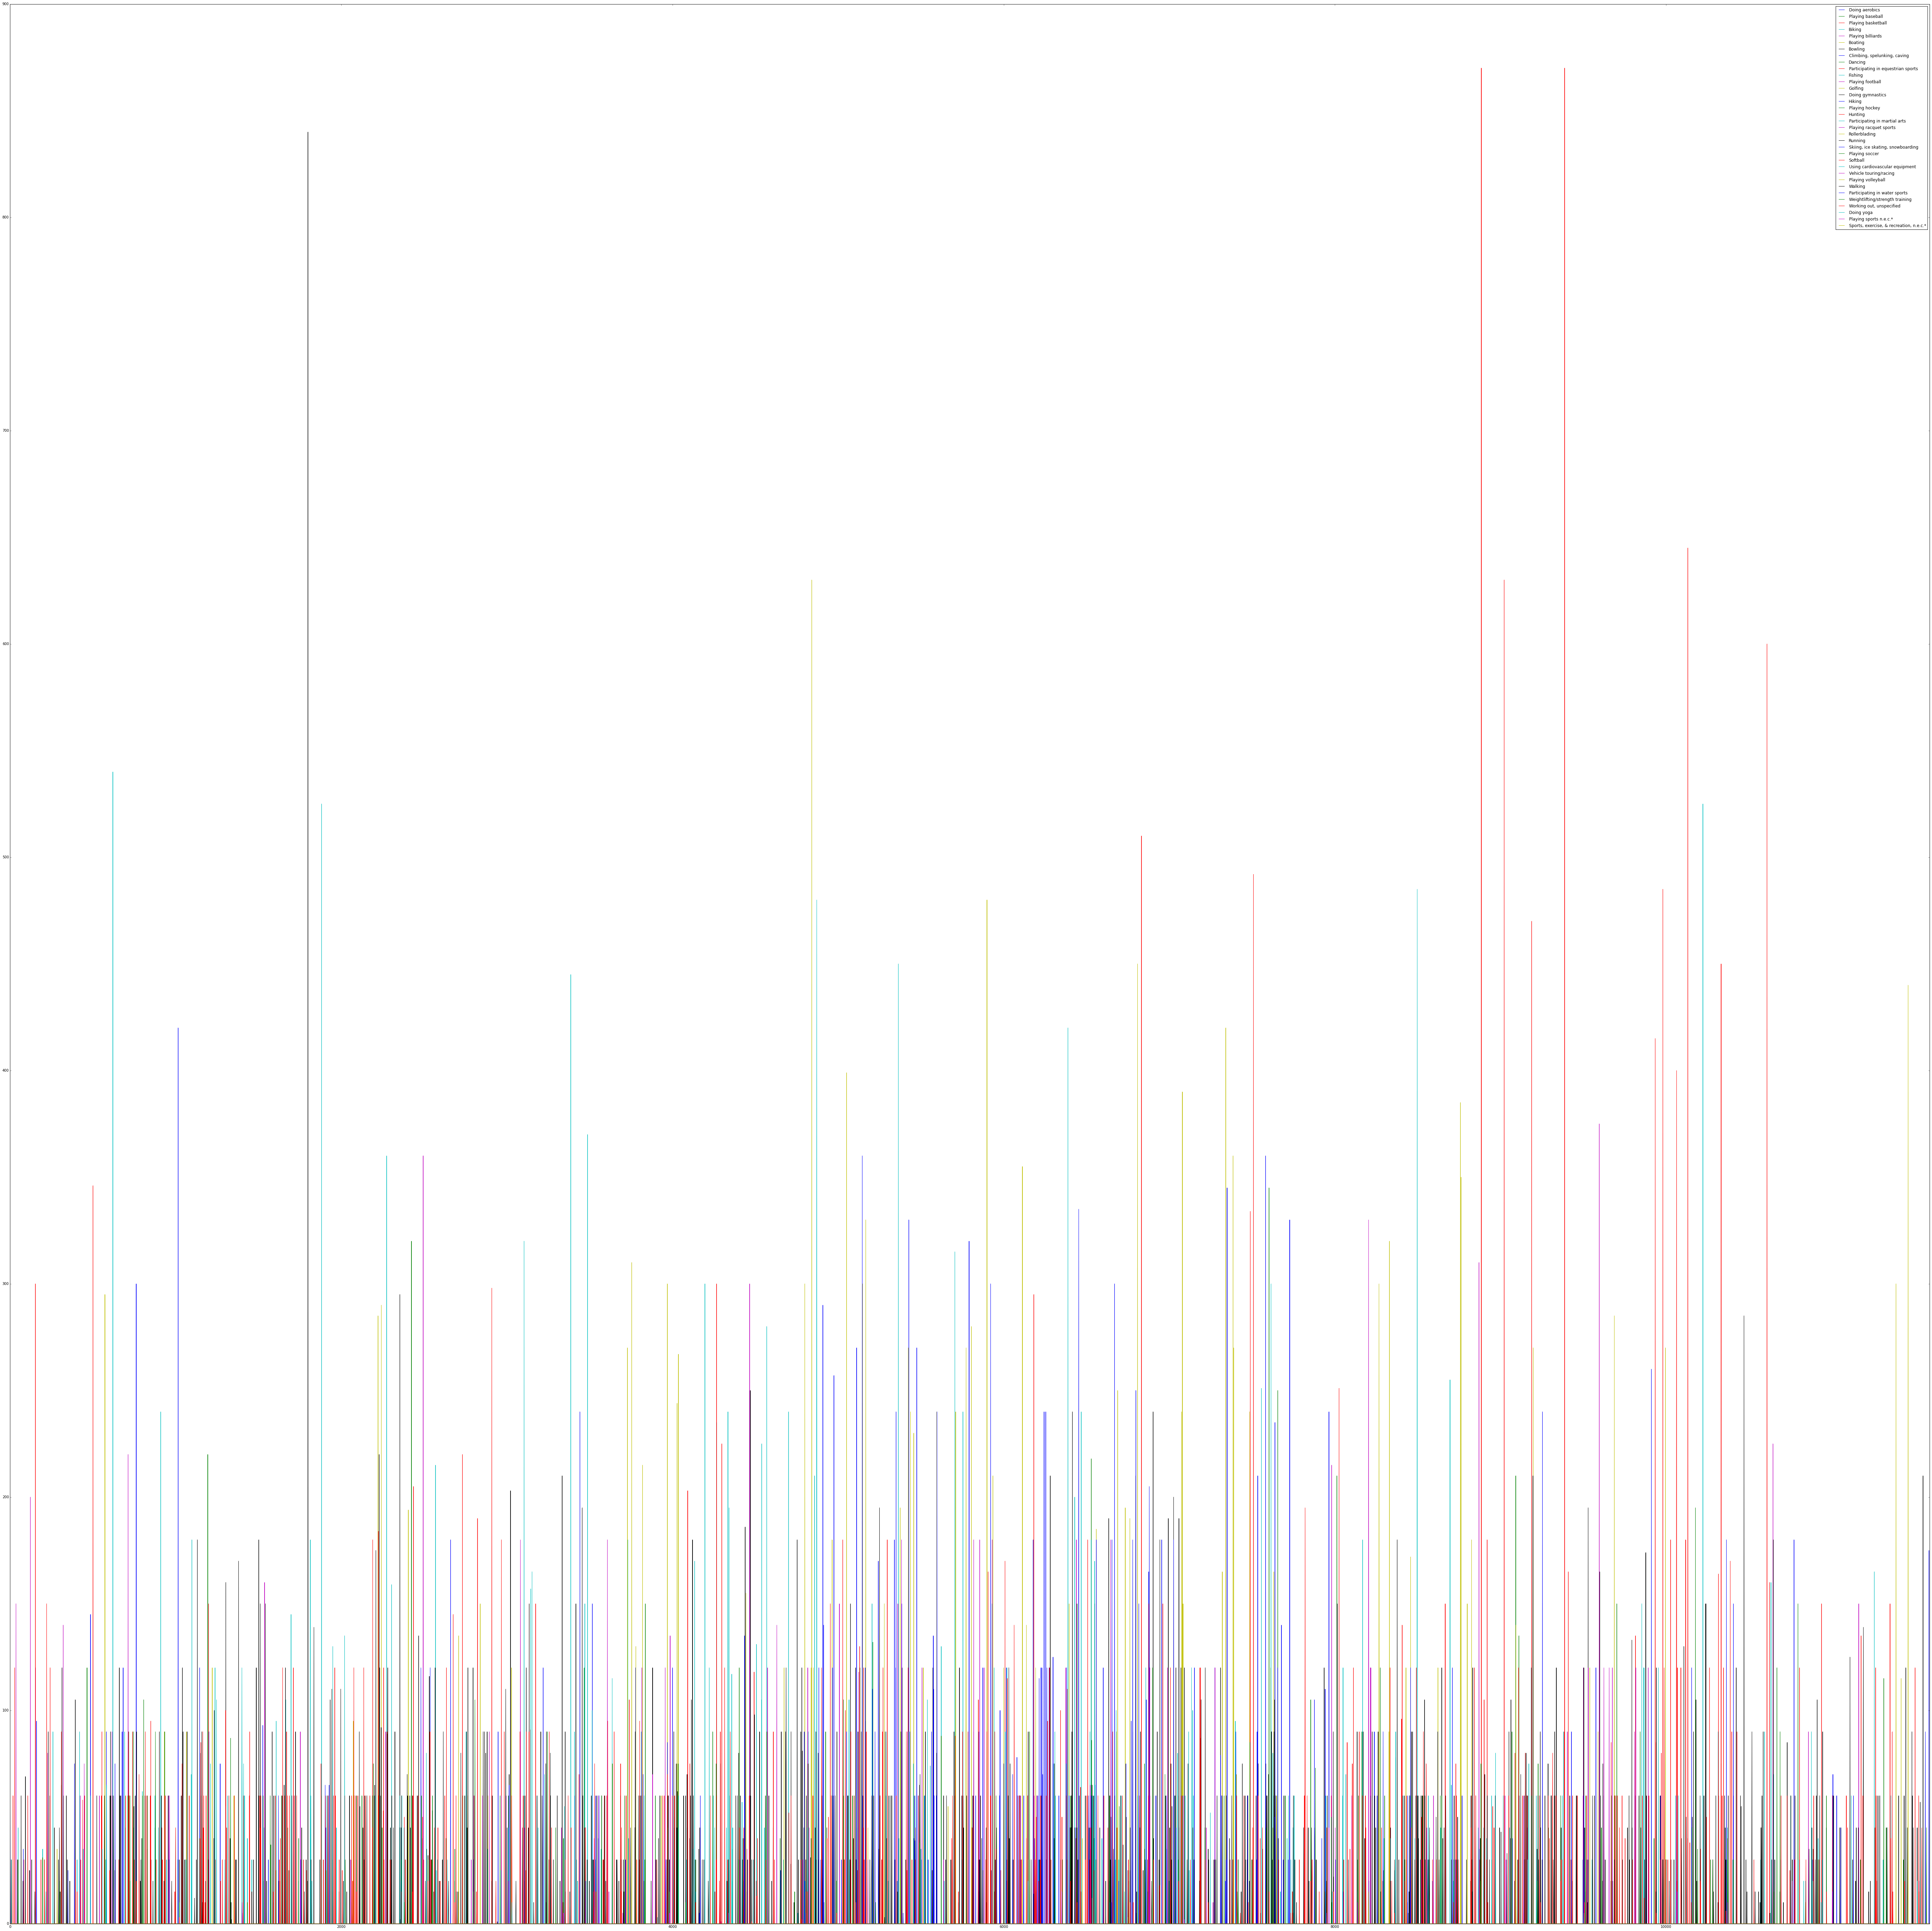

In [51]:
adult_participant.plot(figsize=(100,100))

# Correlations

Strictly looking at the adult male population surveyed in 2014, the correlation values given do not infer that there is not a significant relationship between age and activity chosen, as walking was the most time-consuming activity for adult males, and it only returned a correlation between age and itself of .068. 

In [67]:
adult_male_participant.corr()

,id,sex,age,Doing aerobics,Playing baseball,Playing basketball,Biking,Playing billiards,Boating,Bowling,...,Using cardiovascular equipment,Vehicle touring/racing,Playing volleyball,Walking,Participating in water sports,Weightlifting/strength training,"Working out, unspecified",Doing yoga,Playing sports n.e.c.*,"Sports, exercise, & recreation, n.e.c.*"
id,1.000000,NaN,-0.003826,-0.024627,0.004570,-0.012126,0.004593,0.019517,0.009584,-0.023181,...,-0.000996,-0.005171,0.006981,-0.003846,0.008092,0.000961,-0.002827,-0.023287,-0.003402,0.023201
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.003826,NaN,1.000000,-0.009669,-0.020554,-0.061291,-0.006234,-0.031810,-0.018381,-0.023590,...,0.023522,-0.016189,-0.026144,0.067917,0.001819,-0.055583,-0.028810,0.017706,-0.034605,0.005409
Doing aerobics,-0.024627,NaN,-0.009669,1.000000,-0.000489,-0.001250,-0.001577,-0.001077,-0.000891,-0.001060,...,0.034512,-0.000565,-0.000469,0.013716,-0.002038,-0.003011,-0.004408,-0.001087,-0.001619,-0.000353
Playing baseball,0.004570,NaN,-0.020554,-0.000489,1.000000,-0.001070,0.024961,-0.000922,-0.000762,-0.000908,...,-0.002018,-0.000484,-0.000401,-0.003358,-0.001745,0.021720,-0.003774,-0.000930,-0.001386,-0.000302
Playing basketball,-0.012126,NaN,-0.061291,-0.001250,-0.001070,1.000000,-0.003454,-0.002358,-0.001951,-0.002322,...,-0.005162,-0.001238,-0.001026,-0.008591,-0.004464,0.004785,0.024951,-0.002380,-0.003545,-0.000773
Biking,0.004593,NaN,-0.006234,-0.001577,0.024961,-0.003454,1.000000,-0.002975,-0.002461,-0.002929,...,-0.005650,-0.001562,-0.001295,-0.005169,-0.005632,0.023695,-0.005845,0.030041,-0.004473,-0.000975
Playing billiards,0.019517,NaN,-0.031810,-0.001077,-0.000922,-0.002358,-0.002975,1.000000,-0.001680,0.003647,...,-0.004445,-0.001066,-0.000884,-0.007399,-0.003844,-0.005679,0.003389,-0.002049,-0.003053,-0.000666
Boating,0.009584,NaN,-0.018381,-0.000891,-0.000762,-0.001951,-0.002461,-0.001680,1.000000,-0.001654,...,-0.003678,-0.000882,-0.000731,-0.006121,0.074630,-0.004698,-0.006879,-0.001696,0.000592,-0.000551
Bowling,-0.023181,NaN,-0.023590,-0.001060,-0.000908,-0.002322,-0.002929,0.003647,-0.001654,1.000000,...,0.036171,-0.001050,-0.000870,-0.007286,0.026854,-0.005592,-0.008187,-0.002018,-0.003007,-0.000655
